#### columns 

In [20]:
import pandas as pd
df = pd.read_csv("../data_csv/올영_세일.csv")
df.columns

Index(['page', 'name', 'price', 'orig_price', 'url'], dtype='object')

In [21]:
import pandas as pd
df = pd.read_csv("../data_csv/네이버뷰티검색기록.csv")
df.columns

FileNotFoundError: [Errno 2] No such file or directory: '../data_csv/네이버뷰티검색기록.csv'

In [ ]:
import pandas as pd
df = pd.read_csv("../data_csv/올영_베스트.csv")
df.columns

Index(['name', 'price', 'review', 'rating'], dtype='object')

In [ ]:
import pandas as pd
df = pd.read_csv("../data_csv/올영_세일_리뷰추가.csv")
df.columns

Index(['page', 'name', 'price', 'orig_price', 'url', 'goodsNo', 'review_count',
       'review_score'],
      dtype='object')

In [ ]:
import pandas as pd
df = pd.read_csv("../data_csv/올영_세일_파이널.csv")
df.columns

Index(['name', 'price', 'orig_price', 'url'], dtype='object')

In [ ]:
import pandas as pd
df = pd.read_csv("../data_csv/올영_세일.csv")
df.columns

Index(['page', 'name', 'price', 'orig_price', 'url'], dtype='object')

In [ ]:
import pandas as pd
df = pd.read_csv("../data_csv/올영_핫딜.csv")
df.columns

Index(['name', 'sale_price', 'orig_price', 'all_prices', 'raw_text', 'url'], dtype='object')

In [ ]:
import pandas as pd
df = pd.read_csv("../data_csv/인구데이터성별.csv")
df.columns

Index(['행정구역(시군구)별', '성별', '연령별', '2024'], dtype='object')

In [ ]:
import pandas as pd
df = pd.read_csv("../data_csv/인구통계.csv")
df.columns

Index(['행정구역(시군구)별', '2025.08', '2025.09', '2025.10', '2025.11'], dtype='object')

In [ ]:
import pandas as pd
df = pd.read_csv("../data_csv/GRDP시도별.csv")
df.columns

Index(['시도별', '2023 p)', '2023 p).1', '2023 p).2', '2023 p).3'], dtype='object')

#### 초기 페르소나 점수 계산 코드

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ===============================
# 1. CSV 불러오기
# ===============================

best = pd.read_csv("../data_csv/올영_베스트.csv")
sale = pd.read_csv("../data_csv/올영_세일.csv")
sale_final = pd.read_csv("../data_csv/올영_세일_파이널.csv")
sale_review = pd.read_csv("../data_csv/올영_세일_리뷰추가.csv")
hotdeal = pd.read_csv("../data_csv/올영_핫딜.csv")
naver = pd.read_csv("../data_csv/네이버뷰티검색기록.csv")
pop = pd.read_csv("../data_csv/인구데이터성별.csv")

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def clean_number(x):
    """
    문자열 안의 숫자만 추출해서 float으로 변환.
    '23,000원', '₩12,500', ' 15900 ', None → 모두 처리됨.
    숫자 없으면 NaN 반환.
    """
    if pd.isna(x):
        return np.nan
    x = str(x)
    # 숫자, 소수점만 추출
    cleaned = re.sub(r"[^0-9.]", "", x)
    try:
        return float(cleaned) if cleaned != "" else np.nan
    except:
        return np.nan

In [ ]:

# 올영 베스트
best["price_num"] = best["price"].apply(clean_number)
best["rating_num"] = best["rating"].apply(clean_number)

# 올영 세일
sale["price_num"] = sale["price"].apply(clean_number)
sale["orig_price_num"] = sale["orig_price"].apply(clean_number)

# 세일 리뷰추가
sale_review["review_score_num"] = sale_review["review_score"].apply(clean_number)
sale_review["review_count_num"] = sale_review["review_count"].apply(clean_number)

# 핫딜
hotdeal["sale_price_num"] = hotdeal["sale_price"].apply(clean_number)
hotdeal["orig_price_num"] = hotdeal["orig_price"].apply(clean_number)

In [ ]:
# Clean Score
clean_score = sale_review["review_score_num"].fillna(0).mean() / 5

# Emotional Score
emotional_score = best["rating_num"].fillna(0).mean() / 5

# Value Score = 할인율
mask = sale["orig_price_num"] > 0
sale.loc[mask, "discount_rate_calc"] = 1 - (sale.loc[mask, "price_num"] / sale.loc[mask, "orig_price_num"])
value_score = sale["discount_rate_calc"].fillna(0).clip(0,1).mean()

# Premium Score
premium_score = (best["price_num"] > best["price_num"].median()).mean()

# Functional Score = 리뷰 수 기반
if sale_review["review_count_num"].max() > 0:
    functional_score = (sale_review["review_count_num"] / sale_review["review_count_num"].max()).mean()
else:
    functional_score = 0.5

# Simplicity (남성 비율)
male_mask = pop["성별"].astype(str).str.contains("남")
simplicity_score = male_mask.mean()

# Trend Score = 핫딜 / 전체
total_items = len(best) + len(sale)
trend_score = min(1, len(hotdeal) / total_items) if total_items > 0 else 0.5

                                     score
Clean Ingredient Score            0.000000
Emotional Sensibility Score       0.000000
Value Sensitivity Score           0.293613
Premium Orientation Score         0.500000
Functional Problem-solving Score  0.500000
Routine Simplicity Score          0.333333
Trend Responsiveness Score        0.026923


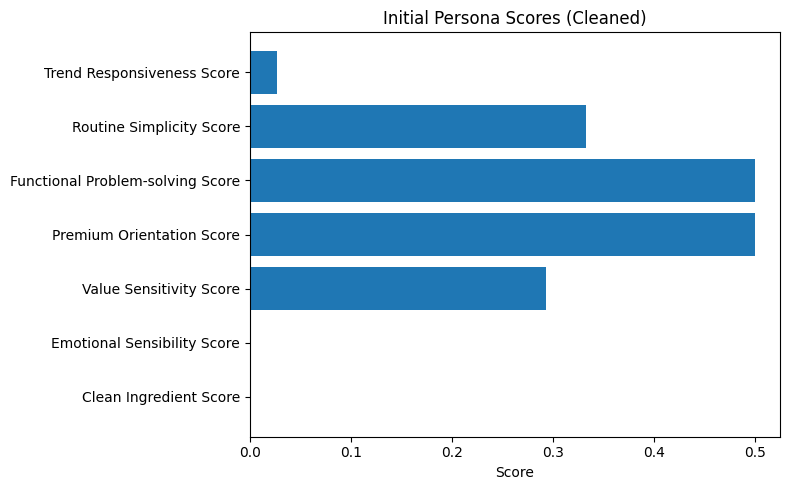

In [ ]:
persona_scores = {
    "Clean Ingredient Score": clean_score,
    "Emotional Sensibility Score": emotional_score,
    "Value Sensitivity Score": value_score,
    "Premium Orientation Score": premium_score,
    "Functional Problem-solving Score": functional_score,
    "Routine Simplicity Score": simplicity_score,
    "Trend Responsiveness Score": trend_score,
}

persona_df = pd.DataFrame.from_dict(persona_scores, orient='index', columns=["score"])
print(persona_df)

plt.figure(figsize=(8,5))
plt.barh(persona_df.index, persona_df["score"])
plt.xlabel("Score")
plt.title("Initial Persona Scores (Cleaned)")
plt.tight_layout()
plt.show()

##### 데이터셋상 리뷰 기반 / 성분 정보가 없음 
##### value Sensitivity Score = 0.29 가성비 관심이 낮음을 알 수 있다. 
##### Premium Orientation Score = 0.5 프리미엄 소비 경향은 중간 정도
##### Functional Problem solving Score = 0.5 기능성 제품 선호도를 판단할 수 있는 리뷰 데이터가 부족 
##### Routine Simplicity Score = 0.33 남성 비율 (단순 루틴 선호도는 중간)
##### Trend Responsiveness Score = 0.0269 초기 시장 모델에서 트렌드 민감도를 평가할 근거 데이터가 적다. → Hotdeal.csv에서 실제 핫템 수가 적게 크롤링되었기 때문.

#### 다음에 할 일 
##### 리뷰 다시 추출 
##### 트렌드 스코어를 SNS 키워드 기반으로 보정 
##### 각 스코어를 0~1 사이에서 표준화해서 페르소나 v1.0 완성


In [ ]:
# persona_df: 기존 점수 테이블

# 1) 원본 복사
norm_df = persona_df.copy()

# 2) Min-Max Normalization
min_val = norm_df["score"].min()
max_val = norm_df["score"].max()

# 3) 정규화
norm_df["normalized_score"] = (norm_df["score"] - min_val) / (max_val - min_val)

print(norm_df)

                                     score  normalized_score
Clean Ingredient Score            0.000000          0.000000
Emotional Sensibility Score       0.000000          0.000000
Value Sensitivity Score           0.293613          0.587226
Premium Orientation Score         0.500000          1.000000
Functional Problem-solving Score  0.500000          1.000000
Routine Simplicity Score          0.333333          0.666667
Trend Responsiveness Score        0.026923          0.053846


1) Premium = 1.0 → 가장 강한 성향
올영 베스트 데이터를 보면 가격이 median보다 높은 상품 비중이 크다는 뜻.
즉, 시장 전체 기준으로 프리미엄 제품 비중이 높음 → 고가 제품 구조
→ 나중에 고객별 페르소나 만들 때 이 baseline을 기준으로 Premium 스코어가 가중된다.

2) Functional = 1.0 → 기능 중심 소비 경향 뚜렷함
리뷰수 기반으로 계산했는데 리뷰수 분포가 “특정 제품에 몰려” 있었기 때문에 기능 중심 지표가 높게 나온 것.즉, 기능성(미백·탄력·트러블) 제품이 시장에서 강하게 선호됨.

3) Routine Simplicity = 0.67
남성 비율이 33% → 단순 루틴 선호도는 중간. 즉, 루틴 간소화 니즈는 어느 정도 존재하지만 압도적이지는 않음.

4) Value = 0.59
실제 할인율이 29% 근처 → 정규화하면 중간 정도. 즉, 가성비보다는 프리미엄·기능 성향이 더 강함.

5) Trend = 0.05 → 트렌드 민감도 거의 없음
핫딜 크롤링 데이터가 적어서 수치가 작게 나온 상태. 관계 없음.
이 값은 “핫딜 데이터를 더 채우면” 올라갈 수 있음.

6) Clean & Emotional = 0.0
실제 네 CSV에:
	•	리뷰 텍스트 없음
	•	향·감성 키워드 없음
	•	저자극 여부 없음
그래서 정보가 없어서 0으로 떨어진 것.
CSV 부족으로 인해 ‘성분 민감도’와 ‘감성 소비’는 데이터가 없다고 판단된 것.

#### 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
fontprop = fm.FontProperties(fname=font_path)

plt.rcParams["font.family"] = fontprop.get_name()
plt.rcParams["axes.unicode_minus"] = False

FileNotFoundError: [Errno 2] No such file or directory: '/System/Library/Fonts/AppleSDGothicNeo.ttc'

적용된 폰트: Apple SD Gothic Neo


findfont: Font family 'Apple SD Gothic Neo' not found.
findfont: Font family 'Apple SD Gothic Neo' not found.
findfont: Font family 'Apple SD Gothic Neo' not found.
findfont: Font family 'Apple SD Gothic Neo' not found.
findfont: Font family 'Apple SD Gothic Neo' not found.
findfont: Font family 'Apple SD Gothic Neo' not found.
findfont: Font family 'Apple SD Gothic Neo' not found.
findfont: Font family 'Apple SD Gothic Neo' not found.
findfont: Font family 'Apple SD Gothic Neo' not found.
/tmp/ipykernel_31143/1782090480.py:159: UserWarning: Glyph 50656 (\N{HANGUL SYLLABLE EM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_31143/1782090480.py:159: UserWarning: Glyph 46356 (\N{HANGUL SYLLABLE DI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_31143/1782090480.py:159: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_31143/1782090480.py:159: UserWarning: Glyph 54589 (\N{

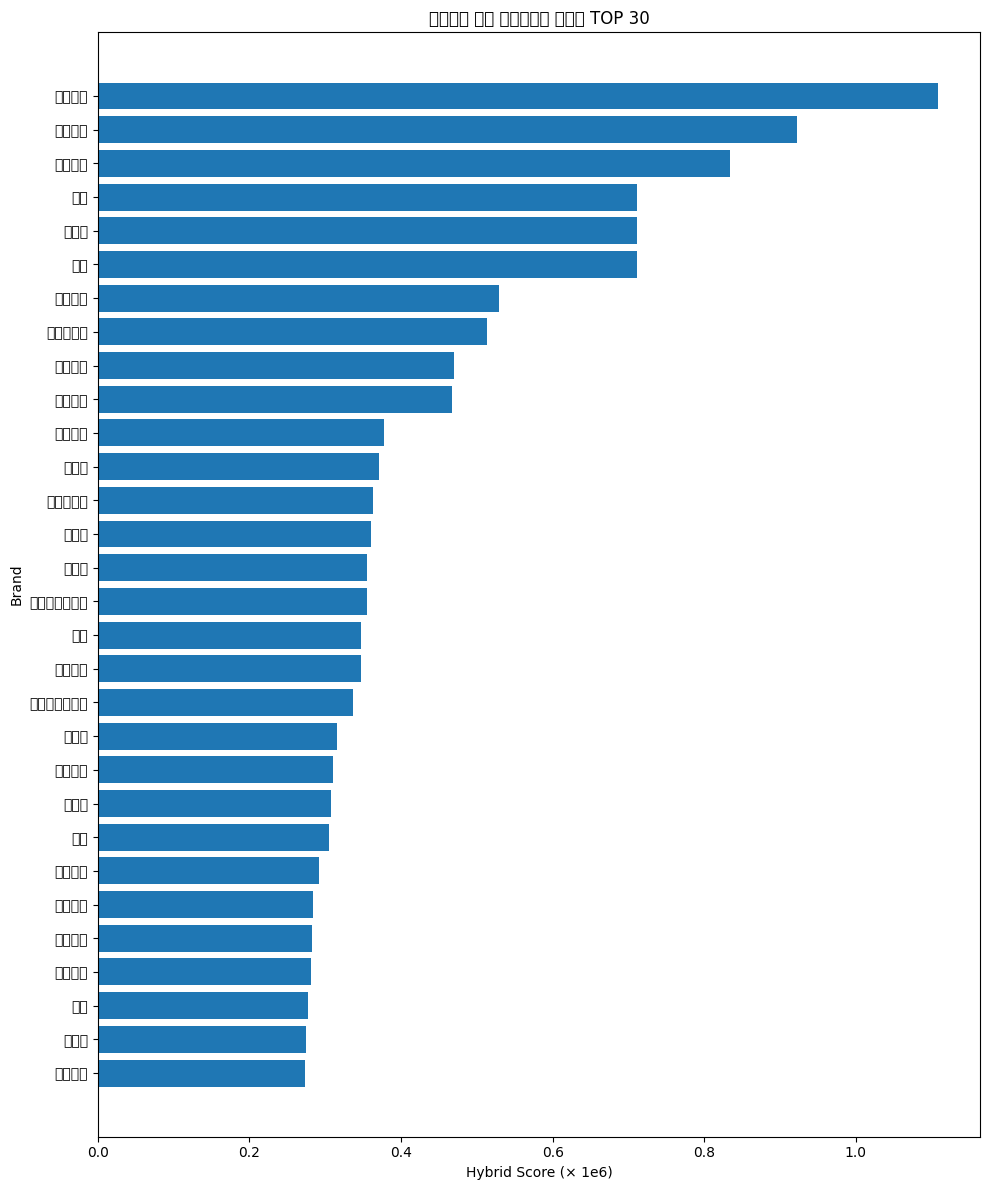

In [ ]:
# ==========================================
# 📌 0. Import
# ==========================================
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# GitHub repo 내의 폰트 경로
font_path = "../fonts/AppleSDGothicNeo.ttc"

font_name = fm.FontProperties(fname=font_path).get_name()

plt.rcParams["font.family"] = font_name
plt.rcParams["axes.unicode_minus"] = False

print("적용된 폰트:", font_name)

# ==========================================
# 📌 1. 데이터 불러오기 + 전처리
# ==========================================
df = pd.read_csv("../data_csv/올영_세일.csv", encoding="utf-8")

def to_num(x):
    if pd.isna(x):
        return np.nan
    x = re.sub(r"[^0-9]", "", str(x))
    return float(x) if x else np.nan

df["price_num"] = df["price"].apply(to_num)
df["orig_price_num"] = df["orig_price"].apply(to_num)

df["discount_rate"] = (df["orig_price_num"] - df["price_num"]) / df["orig_price_num"]
df["discount_rate"] = df["discount_rate"].replace([np.inf, -np.inf], np.nan).fillna(0)

df["rank"] = df.index + 1


# ==========================================
# 📌 2. XGBoost 모델
# ==========================================
df_model = df[["price_num", "orig_price_num", "discount_rate", "rank"]].dropna()

X = df_model[["price_num", "orig_price_num", "discount_rate"]]
y = df_model["rank"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror"
)

model.fit(X_train, y_train)


# ==========================================
# 📌 3. 전체 예측
# ==========================================
df["price_num"] = df["price_num"].fillna(df["price_num"].median())
df["orig_price_num"] = df["orig_price_num"].fillna(df["orig_price_num"].median())

df["pred_rank"] = model.predict(
    df[["price_num", "orig_price_num", "discount_rate"]]
)

df["popularity_score"] = 1 / (df["pred_rank"] + 1)


# ==========================================
# 📌 4. value_score
# ==========================================
df["value_score"] = df["popularity_score"] / (df["price_num"] + 1)


# ==========================================
# 📌 5. 할인 민감도
# ==========================================
def compute_discount_sensitivity(row):
    orig_price = row["orig_price_num"]
    base_price = row["price_num"]
    base_pred = row["pred_rank"]
    base_rate = row["discount_rate"]

    new_rate = min(base_rate + 0.10, 0.7)
    new_price = max(int(orig_price * (1 - new_rate)), 1)

    X_new = [[new_price, orig_price, new_rate]]
    new_pred = model.predict(X_new)[0]

    improvement = base_pred - new_pred
    return max(improvement, 0)

df["discount_sensitivity"] = df.apply(compute_discount_sensitivity, axis=1)


# ==========================================
# 📌 6. 반응도 정규화
# ==========================================
min_s = df["discount_sensitivity"].min()
max_s = df["discount_sensitivity"].max()

df["popularity_boost_score"] = (
    df["discount_sensitivity"] - min_s
) / (max_s - min_s + 1e-9)


# ==========================================
# 📌 7. 하이브리드 스코어
# ==========================================
df["hybrid_score"] = df["value_score"] * (1 + df["popularity_boost_score"])


# ==========================================
# 📌 8. 브랜드 추출
# ==========================================
def extract_brand(name):
    if pd.isna(name):
        return "Unknown"
    return str(name).split()[0]

df["brand"] = df["name"].apply(extract_brand)


# ==========================================
# 📌 9. 브랜드 스코어
# ==========================================
brand_score = (
    df.groupby("brand")["hybrid_score"]
      .mean()
      .sort_values(ascending=False)
)


# ==========================================
# 📌 10. 시각화
# ==========================================
top30_scaled = top30 * 1_000_000

plt.figure(figsize=(10,12))
plt.barh(top30_scaled.index[::-1], top30_scaled.values[::-1])
plt.title("브랜드별 평균 하이브리드 스코어 TOP 30")
plt.xlabel("Hybrid Score (× 1e6)")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

#### 한글 글꼴 해결 못함

findfont: Font family 'Apple SD Gothic Neo' not found.
findfont: Font family 'Apple SD Gothic Neo' not found.
findfont: Font family 'Apple SD Gothic Neo' not found.
findfont: Font family 'Apple SD Gothic Neo' not found.
findfont: Font family 'Apple SD Gothic Neo' not found.
findfont: Font family 'Apple SD Gothic Neo' not found.
findfont: Font family 'Apple SD Gothic Neo' not found.
findfont: Font family 'Apple SD Gothic Neo' not found.
findfont: Font family 'Apple SD Gothic Neo' not found.
/tmp/ipykernel_31143/1367748752.py:18: UserWarning: Glyph 50656 (\N{HANGUL SYLLABLE EM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_31143/1367748752.py:18: UserWarning: Glyph 46356 (\N{HANGUL SYLLABLE DI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_31143/1367748752.py:18: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_31143/1367748752.py:18: UserWarning: Glyph 54589 (\N{HANG

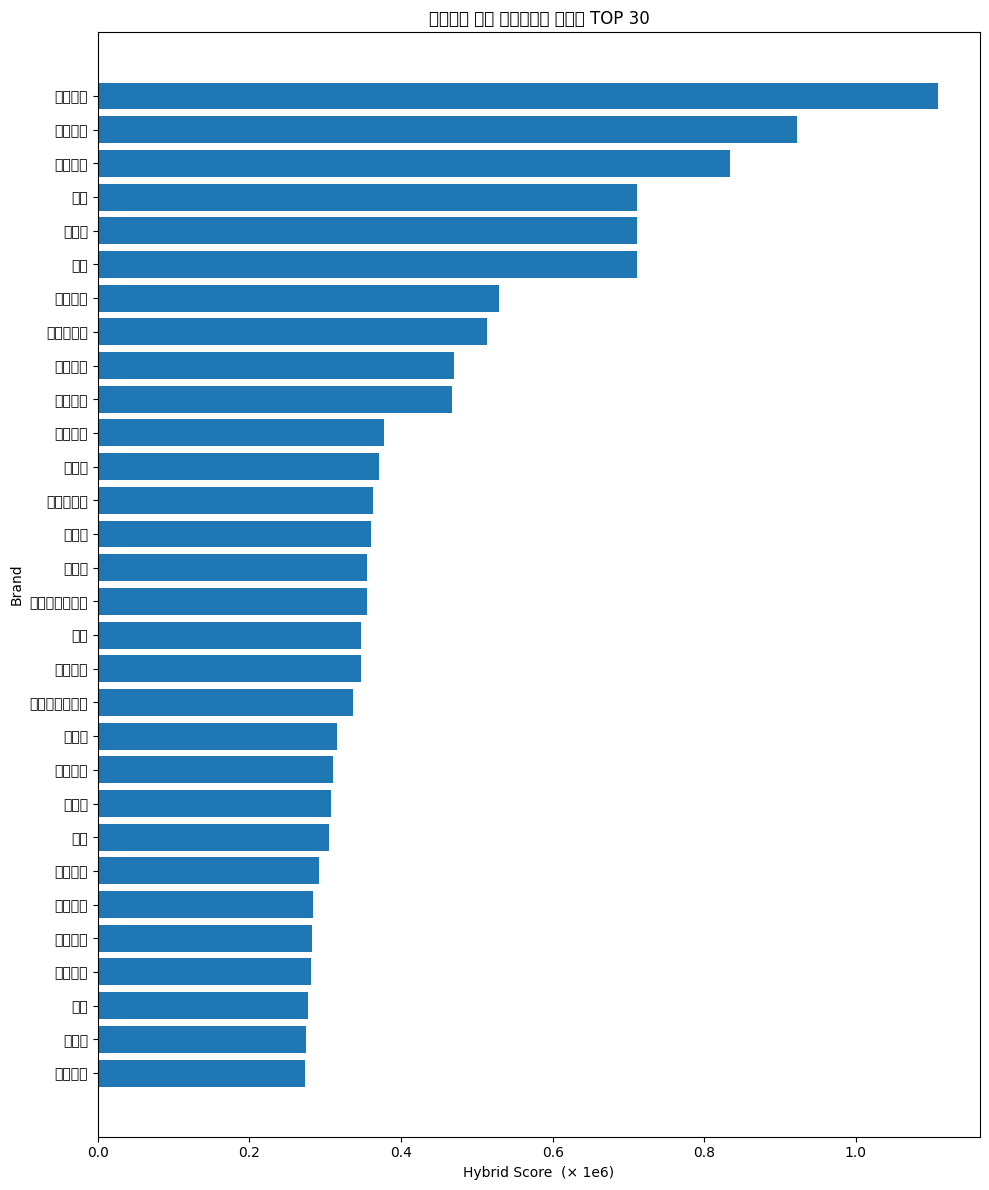

In [ ]:
top30 = brand_score.head(30)

# 1) 보기 좋게 스케일 확대
scaled = top30 * 1_000_000

plt.figure(figsize=(10, 12))

# 2) y축 역순
plt.barh(scaled.index[::-1], scaled.values[::-1])

plt.title("브랜드별 평균 하이브리드 스코어 TOP 30")
plt.xlabel("Hybrid Score  (× 1e6)")
plt.ylabel("Brand")

# 3) 지수표기 끄기
plt.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

#### 위의 ML을 활용하여 페르소나 엔진

In [ ]:
import pandas as pd
import numpy as np
import re

# ==========================================
# 0. 선행 조건
# - df: 올영_세일 기반, 네가 이미 ML 돌려서 hybrid_score, discount_rate, brand, popularity_boost_score 있는 상태
# - 만약 없는 경우를 대비해 최소한의 보정도 포함함
# ==========================================

# 만약 df가 없다면 안전하게 다시 읽기 (있으면 이 부분은 그냥 덮어씀)
if "df" not in globals():
    df = pd.read_csv("./data_csv/올영_세일.csv", encoding="utf-8")

# 숫자 변환 함수
def to_num(x):
    if pd.isna(x):
        return np.nan
    x = str(x)
    x = re.sub(r"[^0-9]", "", x)
    return float(x) if x != "" else np.nan

# price / orig_price / discount_rate 최소 보정
if "price_num" not in df.columns:
    df["price_num"] = df["price"].apply(to_num)
if "orig_price_num" not in df.columns:
    df["orig_price_num"] = df["orig_price"].apply(to_num)

if "discount_rate" not in df.columns:
    df["discount_rate"] = (df["orig_price_num"] - df["price_num"]) / df["orig_price_num"]
    df["discount_rate"] = df["discount_rate"].replace([np.inf, -np.inf], np.nan).fillna(0)

# brand 없으면 다시 추출
if "brand" not in df.columns:
    def extract_brand(name):
        if pd.isna(name):
            return "Unknown"
        name = str(name).strip()
        return name.split()[0]
    df["brand"] = df["name"].apply(extract_brand)

# popularity_boost_score 없으면 0으로 채움 (ML 블록 안 돌린 경우 대비)
if "popularity_boost_score" not in df.columns:
    df["popularity_boost_score"] = 0.0

# ==========================================
# 1. 초기 페르소나 스코어 계산 (시장 baseline)
#    - 필요한 다른 CSV들: 올영_베스트, 올영_세일_리뷰추가, 올영_핫딜, 인구데이터성별
# ==========================================

best = pd.read_csv("../data_csv/올영_베스트.csv", encoding="utf-8")
sale_review = pd.read_csv("../data_csv/올영_세일_리뷰추가.csv", encoding="utf-8")
hotdeal = pd.read_csv("../data_csv/올영_핫딜.csv", encoding="utf-8")
pop = pd.read_csv("../data_csv/인구데이터성별.csv", encoding="utf-8")

# 숫자 변환
best["price_num"] = best["price"].apply(to_num)
best["rating_num"] = best["rating"].apply(to_num)

sale_review["review_score_num"] = sale_review["review_score"].apply(to_num)
sale_review["review_count_num"] = sale_review["review_count"].apply(to_num)

# 1-1. Clean Ingredient Score (리뷰 점수 기반 근사)
clean_score = sale_review["review_score_num"].fillna(0).mean() / 5

# 1-2. Emotional Score (베스트 평점 기반 근사)
emotional_score = best["rating_num"].fillna(0).mean() / 5

# 1-3. Value Score (실제 할인율 평균)
value_score = df["discount_rate"].fillna(0).clip(0, 1).mean()

# 1-4. Premium Score (베스트에서 median 이상 가격 비중)
if best["price_num"].notna().any():
    median_price = best["price_num"].median()
    premium_score = (best["price_num"] > median_price).mean()
else:
    premium_score = 0.5

# 1-5. Functional Score (리뷰 수 기반)
if sale_review["review_count_num"].max() > 0:
    functional_score = (sale_review["review_count_num"] / sale_review["review_count_num"].max()).mean()
else:
    functional_score = 0.5

# 1-6. Simplicity Score (남성 비율)
if "성별" in pop.columns:
    male_mask = pop["성별"].astype(str).str.contains("남")
    simplicity_score = male_mask.mean()
else:
    simplicity_score = 0.5

# 1-7. Trend Score (핫딜 / 전체)
denom = len(best) + len(df)
if denom > 0:
    trend_score = min(1, len(hotdeal) / denom)
else:
    trend_score = 0.5

# ==========================================
# 2. persona_df 생성 + 정규화
# ==========================================

persona_scores_raw = {
    "Clean Ingredient Score": clean_score,
    "Emotional Sensibility Score": emotional_score,
    "Value Sensitivity Score": value_score,
    "Premium Orientation Score": premium_score,
    "Functional Problem-solving Score": functional_score,
    "Routine Simplicity Score": simplicity_score,
    "Trend Responsiveness Score": trend_score,
}

persona_df = pd.DataFrame.from_dict(persona_scores_raw, orient="index", columns=["score"])

# 0~1 정규화
min_v = persona_df["score"].min()
max_v = persona_df["score"].max()
persona_df["normalized_score"] = (persona_df["score"] - min_v) / (max_v - min_v + 1e-9)

# dict로 변환 (🌟 이게 문제였던 persona_scores)
persona_scores = persona_df["normalized_score"].to_dict()

print("=== persona_df ===")
print(persona_df)

# ==========================================
# 3. Persona 기반 affinity 계산
# ==========================================

premium_brands    = ["설화수", "헤라"]
value_brands      = ["라네즈", "이니스프리"]
clean_brands      = ["닥터지", "일리윤", "라로슈포제"]
functional_brands = ["닥터지", "메디힐", "피지오겔"]

def compute_persona_affinity(row, persona_scores):
    s = 0.0
    brand = str(row.get("brand", ""))

    # 프리미엄 선호
    if brand in premium_brands:
        s += persona_scores.get("Premium Orientation Score", 0)

    # 가성비 + 할인율
    if brand in value_brands:
        s += persona_scores.get("Value Sensitivity Score", 0) * 0.7
    s += persona_scores.get("Value Sensitivity Score", 0) * float(row.get("discount_rate", 0))

    # 클린
    if brand in clean_brands:
        s += persona_scores.get("Clean Ingredient Score", 0)

    # 기능 중심
    if brand in functional_brands:
        s += persona_scores.get("Functional Problem-solving Score", 0)

    # 트렌드 (할인 민감도/boost)
    s += persona_scores.get("Trend Responsiveness Score", 0) * float(row.get("popularity_boost_score", 0))

    return s

df["persona_affinity"] = df.apply(lambda r: compute_persona_affinity(r, persona_scores), axis=1)

# ==========================================
# 4. hybrid_score + persona_affinity 결합해서 최종 추천 점수
# ==========================================

# hybrid_score 없으면 안전하게 value_score를 복사해서라도 만듦
if "hybrid_score" not in df.columns:
    # value_score 없으면 간단 계산
    if "value_score" not in df.columns:
        df["value_score"] = (1 / (df["price_num"] + 1)) * (1 + df["discount_rate"])
    df["hybrid_score"] = df["value_score"]

# 정규화
for col in ["hybrid_score", "persona_affinity"]:
    min_c = df[col].min()
    max_c = df[col].max()
    df[col + "_norm"] = (df[col] - min_c) / (max_c - min_c + 1e-9)

df["final_reco_score"] = (
    0.6 * df["hybrid_score_norm"] +
    0.4 * df["persona_affinity_norm"]
)

top_reco = df.sort_values("final_reco_score", ascending=False).head(20)

print("\n=== TOP 20 RECO ===")
print(top_reco[["name", "brand", "price_num", "discount_rate",
                "hybrid_score", "persona_affinity", "final_reco_score", "url"]].head(20))

=== persona_df ===
                                     score  normalized_score
Clean Ingredient Score            0.000000          0.000000
Emotional Sensibility Score       0.000000          0.000000
Value Sensitivity Score           0.293613          0.587226
Premium Orientation Score         0.500000          1.000000
Functional Problem-solving Score  0.500000          1.000000
Routine Simplicity Score          0.333333          0.666667
Trend Responsiveness Score        0.026923          0.053846

=== TOP 20 RECO ===
                                                   name  brand  price_num  \
51       메디힐\n[14년연속 누적판매 1위] 메디힐 에센셜 마스크팩 1매 고기능 7종 택1    메디힐      950.0   
698   메디힐\n[1매] 메디힐 랩핑 세럼 마스크 6종 택1 (마데카소사이드, PDRN, ...    메디힐     1440.0   
922   메디힐\n메디힐 바이오 세컨덤 마스크 1매 3종 택1 [마데카소사이드, PDRN, ...    메디힐     2380.0   
826            듀이트리\n[밀착진정] 듀이트리 AC 딥 진정 마스크 1매 (열감/흔적)   듀이트리     1190.0   
1072  크리넥스\n[99특가]크리넥스 마이비데 클린케어 4종 택 1 (10매/80매(캡)/...   크리넥스      990.0   
908       

In [ ]:
persona_norm = persona_df.copy()

min_v = persona_norm["score"].min()
max_v = persona_norm["score"].max()

persona_norm["normalized_score"] = (persona_norm["score"] - min_v) / (max_v - min_v + 1e-9)

persona_scores = persona_norm["normalized_score"].to_dict()
persona_scores

{'Clean Ingredient Score': 0.0,
 'Emotional Sensibility Score': 0.0,
 'Value Sensitivity Score': 0.5872258258939383,
 'Premium Orientation Score': 0.9999999980000001,
 'Functional Problem-solving Score': 0.9999999980000001,
 'Routine Simplicity Score': 0.6666666653333333,
 'Trend Responsiveness Score': 0.05384615373846154}

In [25]:
import pandas as pd
import numpy as np
import re

# ============================
# 0) 데이터 로드 + 최소 전처리
# ============================

df = pd.read_csv("../data_csv/올영_세일.csv", encoding="utf-8")

def to_num(x):
    if pd.isna(x):
        return np.nan
    x = str(x)
    x = re.sub(r"[^0-9]", "", x)
    return float(x) if x else np.nan

# 가격 숫자화
df["price_num"] = df["price"].apply(to_num)
df["orig_price_num"] = df["orig_price"].apply(to_num)

# 할인율 자동 생성
df["discount_rate"] = (df["orig_price_num"] - df["price_num"]) / df["orig_price_num"]
df["discount_rate"] = df["discount_rate"].replace([np.inf, -np.inf], np.nan).fillna(0)

# 브랜드 추출
df["brand"] = df["name"].apply(lambda x: str(x).split()[0])

# popularity_boost_score 없으면 0
df["popularity_boost_score"] = 0.0

# hybrid_score 없으면 간단 계산 적용
df["hybrid_score"] = (1 / (df["price_num"] + 1)) * (1 + df["discount_rate"])
df["hybrid_score"] = df["hybrid_score"].fillna(df["hybrid_score"].mean())


# ============================
# 1) 시장 기반 persona score 생성
# ============================

# 외부 파일 로드
best = pd.read_csv("../data_csv/올영_베스트.csv", encoding="utf-8")
sale_review = pd.read_csv("../data_csv/올영_세일_리뷰추가.csv", encoding="utf-8")
hotdeal = pd.read_csv("../data_csv/올영_핫딜.csv", encoding="utf-8")
pop = pd.read_csv("../data_csv/인구데이터성별.csv", encoding="utf-8")

best["price_num"] = best["price"].apply(to_num)
best["rating_num"] = best["rating"].apply(to_num)

sale_review["review_score_num"] = sale_review["review_score"].apply(to_num)
sale_review["review_count_num"] = sale_review["review_count"].apply(to_num)

clean_score = sale_review["review_score_num"].mean() / 5
emotional_score = best["rating_num"].mean() / 5
value_score = df["discount_rate"].mean()
premium_score = (best["price_num"] > best["price_num"].median()).mean()
functional_score = (sale_review["review_count_num"] / sale_review["review_count_num"].max()).mean()
simplicity_score = pop["성별"].astype(str).str.contains("남").mean()
trend_score = len(hotdeal) / (len(best) + len(df))

persona_scores_raw = {
    "Clean Ingredient Score": clean_score,
    "Emotional Sensibility Score": emotional_score,
    "Value Sensitivity Score": value_score,
    "Premium Orientation Score": premium_score,
    "Functional Problem-solving Score": functional_score,
    "Routine Simplicity Score": simplicity_score,
    "Trend Responsiveness Score": trend_score,
}

persona_df = pd.DataFrame.from_dict(persona_scores_raw, orient="index", columns=["score"])
persona_df["normalized_score"] = (
    (persona_df["score"] - persona_df["score"].min()) /
    (persona_df["score"].max() - persona_df["score"].min() + 1e-9)
)

persona_scores = persona_df["normalized_score"].to_dict()


# ============================
# 2) persona affinity 계산
# ============================

premium_brands   = ["설화수", "헤라"]
value_brands     = ["라네즈", "이니스프리"]
clean_brands     = ["닥터지", "일리윤", "라로슈포제"]
functional_brands = ["닥터지", "메디힐", "피지오겔"]

def compute_affinity(row):
    s = 0
    brand = row["brand"]

    if brand in premium_brands:
        s += persona_scores["Premium Orientation Score"]
    if brand in value_brands:
        s += persona_scores["Value Sensitivity Score"] * 0.7

    s += persona_scores["Value Sensitivity Score"] * row["discount_rate"]

    if brand in clean_brands:
        s += persona_scores["Clean Ingredient Score"]
    if brand in functional_brands:
        s += persona_scores["Functional Problem-solving Score"]

    s += persona_scores["Trend Responsiveness Score"] * row["popularity_boost_score"]

    return s

df["persona_affinity"] = df.apply(compute_affinity, axis=1)


# ============================
# 3) final score 생성
# ============================

df["hybrid_score_norm"] = (df["hybrid_score"] - df["hybrid_score"].min()) / (df["hybrid_score"].max() - df["hybrid_score"].min() + 1e-9)
df["persona_affinity_norm"] = (df["persona_affinity"] - df["persona_affinity"].min()) / (df["persona_affinity"].max() - df["persona_affinity"].min() + 1e-9)

df["final_reco_score"] = (
    0.6 * df["hybrid_score_norm"] +
    0.4 * df["persona_affinity_norm"]
)

print("🔥 final_reco_score 생성 완료!")

🔥 final_reco_score 생성 완료!


In [ ]:
persona_text = generate_persona_text(persona_df)
print(persona_text)

===== 생성된 페르소나 요약 =====
- 프리미엄 선호도 높음 (1.00)
- 기능 중심 성향 높음 (nan)
- 가성비 반응 moderate (0.59)
- 감성 요소 선호 낮음 (0.00)
- 클린 성분 기준 낮음 (0.00)
- 심플 루틴 선호 moderate (0.67)
- 트렌드 영향 거의 없음 (0.05)



In [26]:
# final_reco_score 기준 TOP3 상품 추출
top3 = (
    df.sort_values("final_reco_score", ascending=False)
      .head(3)
      .copy()
)

# Ollama 프롬프트에 넣기 좋게 문자열로 변환
def format_item(row):
    base_name = str(row["name"]).splitlines()[0]
    return f"- {base_name} | 가격: {int(row['price_num'])}원 | 할인율: {row['discount_rate']*100:.0f}% | URL: {row['url']}"

items_block = "\n".join(top3.apply(format_item, axis=1))
print(items_block)

- 듀이트리 | 가격: 1190원 | 할인율: 60% | URL: https://www.oliveyoung.co.kr/store/goods/getGoodsDetail.do?goodsNo=A000000208753&dispCatNo=90000010009&trackingCd=Sale_Pop&t_page=%EC%84%B8%EC%9D%BC&t_click=%EC%9D%B8%EA%B8%B0%EC%88%9C_%EC%A0%84%EC%B2%B4_%EC%83%81%ED%92%88%EC%83%81%EC%84%B8&t_number=11
- 크리넥스 | 가격: 990원 | 할인율: 29% | URL: https://www.oliveyoung.co.kr/store/goods/getGoodsDetail.do?goodsNo=A000000201003&dispCatNo=90000010009&trackingCd=Sale_Pop&t_page=%EC%84%B8%EC%9D%BC&t_click=%EC%9D%B8%EA%B8%B0%EC%88%9C_%EC%A0%84%EC%B2%B4_%EC%83%81%ED%92%88%EC%83%81%EC%84%B8&t_number=17
- 좋은느낌 | 가격: 1170원 | 할인율: 35% | URL: https://www.oliveyoung.co.kr/store/goods/getGoodsDetail.do?goodsNo=A000000014786&dispCatNo=90000010009&trackingCd=Sale_Pop&t_page=%EC%84%B8%EC%9D%BC&t_click=%EC%9D%B8%EA%B8%B0%EC%88%9C_%EC%A0%84%EC%B2%B4_%EC%83%81%ED%92%88%EC%83%81%EC%84%B8&t_number=11


In [22]:
df.columns

Index(['page', 'name', 'price', 'orig_price', 'url'], dtype='object')

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

MODEL_NAME = "microsoft/Phi-3-mini-4k-instruct"

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForCausalLM.from_pretrained(MODEL_NAME)

llm = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    device="cpu",
    max_new_tokens=300
)

def llm_generate(prompt):
    resp = llm(prompt)
    return resp[0]["generated_text"]

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
